# data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Raw Data
path = "/content/Lung Cancer Dataset.csv"
df = pd.read_csv(path)

In [ ]:
df.head(10)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [ ]:
df.shape

(5000, 18)

# data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


In [ ]:
df.columns

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')

In [ ]:
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['PULMONARY_DISEASE'].value_counts(normalize= True)

,proportion
PULMONARY_DISEASE,
NO,0.5926
YES,0.4074


# data visualizations

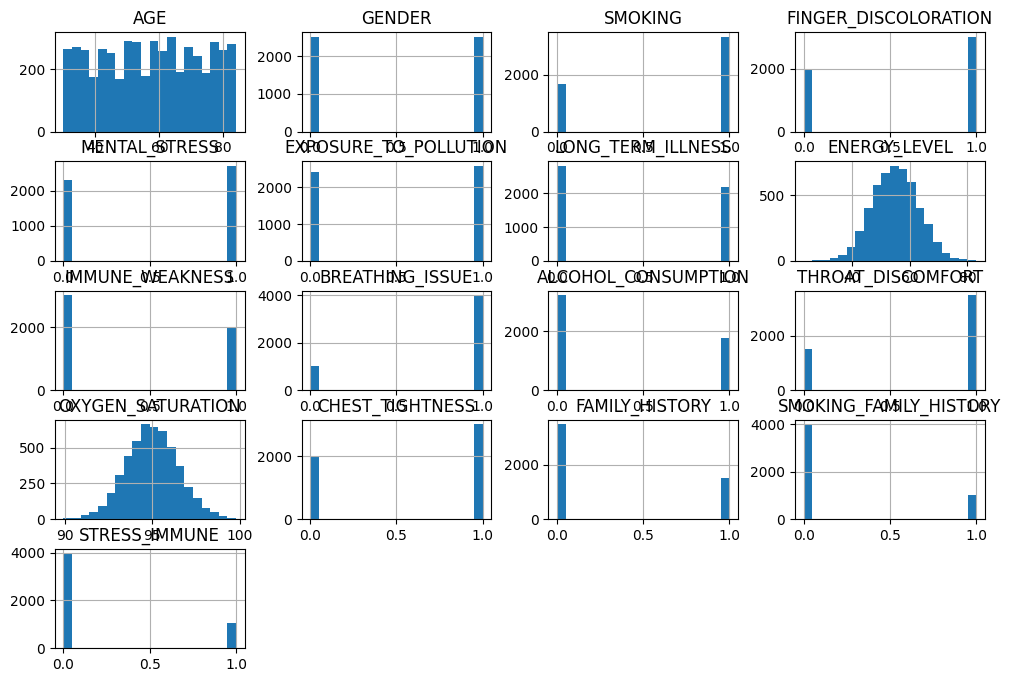

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms
df.hist(figsize=(12, 8), bins=20)
plt.show()


<Axes: >

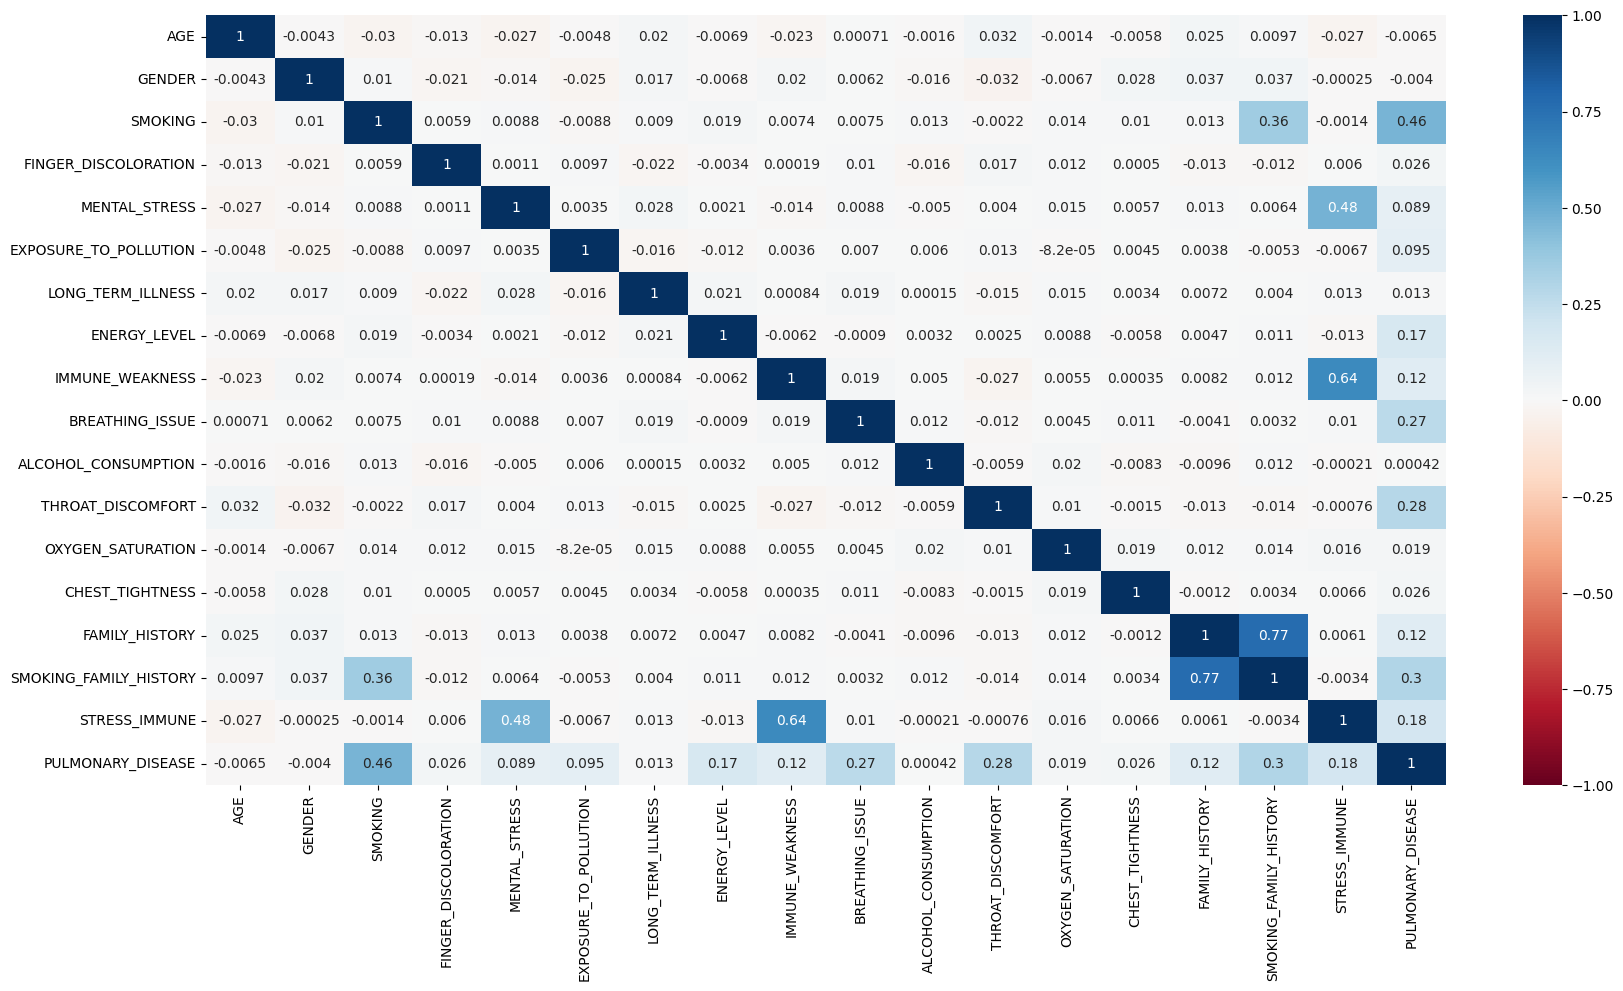

In [ ]:
j = df.copy()
j['PULMONARY_DISEASE'] = pd.get_dummies(j['PULMONARY_DISEASE'],dtype=int,drop_first=True)
plt.figure(figsize=(20, 10))
sns.heatmap(j.corr(), annot=True, cmap="RdBu",vmin=-1,)

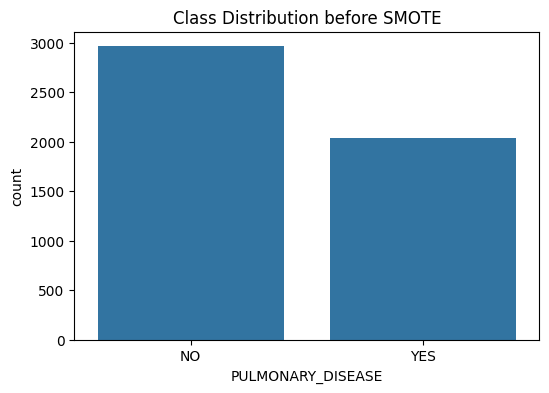

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
import pandas as pd # Import pandas

# Assuming your data is in "Lung Cancer Dataset.csv"
df = pd.read_csv("/content/Lung Cancer Dataset.csv") # Load the dataframe

plt.figure(figsize=(6, 4))
sns.countplot(x="PULMONARY_DISEASE", data=df)
plt.title("Class Distribution before SMOTE")
plt.show()

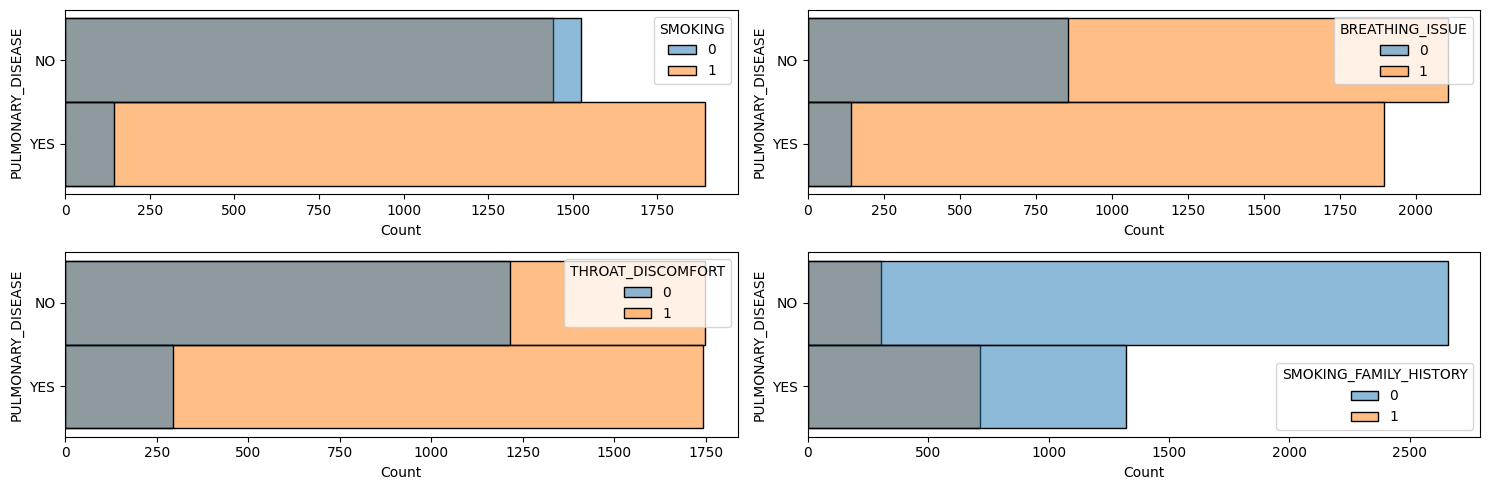

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
sns.histplot(hue= df['SMOKING'],y =df['PULMONARY_DISEASE'],ax=axes[0][0])

sns.histplot(hue= df['BREATHING_ISSUE'],y= df['PULMONARY_DISEASE'],ax=axes[0][1])

sns.histplot(hue= df['THROAT_DISCOMFORT'],y =df['PULMONARY_DISEASE'],ax=axes[1][0])

sns.histplot(hue= df['SMOKING_FAMILY_HISTORY'],y =df['PULMONARY_DISEASE'],ax=axes[1][1])

plt.tight_layout()
plt.show()

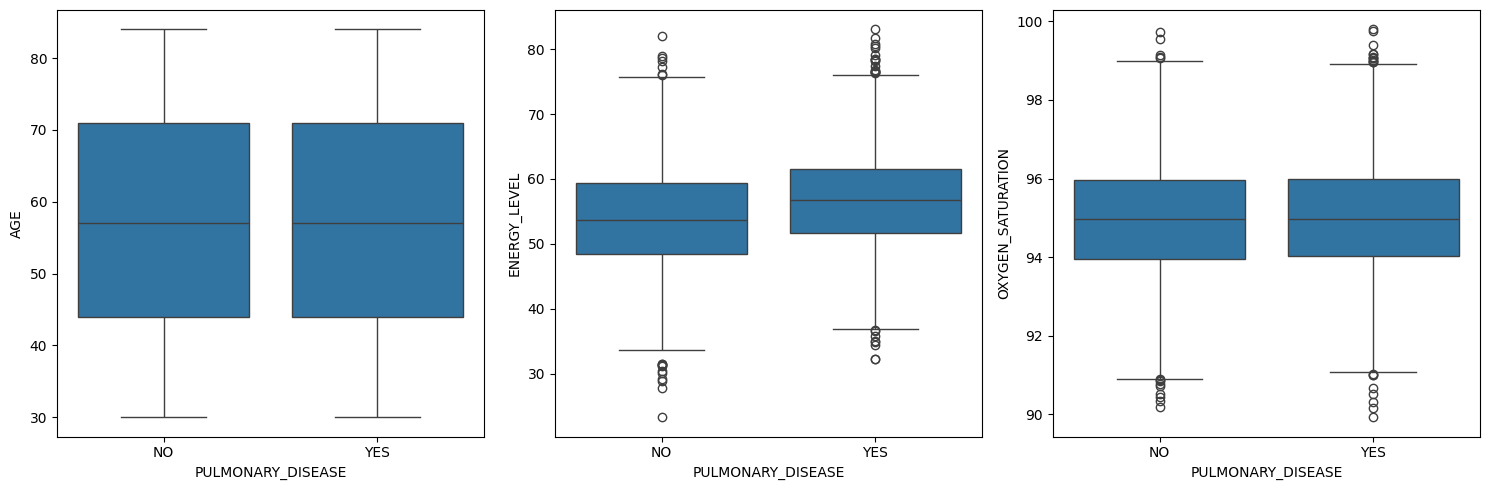

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y= df['AGE'],x =df['PULMONARY_DISEASE'],showfliers=True,ax=axes[0])

sns.boxplot(y= df['ENERGY_LEVEL'],x =df['PULMONARY_DISEASE'],showfliers=True,ax=axes[1])

sns.boxplot(y= df['OXYGEN_SATURATION'],x =df['PULMONARY_DISEASE'],showfliers=True,ax=axes[2])
plt.tight_layout()
plt.show()

# data preprocessing

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Lung Cancer Dataset.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Fill or drop missing values (example: filling with median)
df.fillna(df.median(numeric_only=True), inplace=True)

# Save preprocessed dataset
df.to_csv("preprocessed_dataset.csv", index=False)


Missing values:
 AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical target variable
label_encoder = LabelEncoder()
df["PULMONARY_DISEASE"] = label_encoder.fit_transform(df["PULMONARY_DISEASE"])

# Save encoded dataset
df.to_csv("encoded_dataset.csv", index=False)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scale features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save scaled dataset
df.to_csv("scaled_dataset.csv", index=False)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
df_selected = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support()])

# Save feature-selected dataset
df_selected.to_csv("selected_features_dataset.csv", index=False)

In [ ]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = df[numeric_cols].apply(zscore)

# Keep only rows where Z-score is within acceptable range (-3 to 3)
df_cleaned = df[(z_scores.abs() < 3).all(axis=1)]

# Save cleaned dataset
df_cleaned.to_csv("outliers_removed_dataset.csv", index=False)

In [ ]:
def processing(d):

  df_processed = d.copy()

  # Data Preprocessing :

  #target :
  df_processed['PULMONARY_DISEASE'] = pd.get_dummies(df_processed['PULMONARY_DISEASE'],dtype=int,drop_first=True)

  #normalisation :
  scaler = MinMaxScaler()
  data = df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]
  scaler.fit(data)
  df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']] = scaler.transform(data)
  df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]

  return df_processed

In [ ]:
def processing(d):

  df_processed = d.copy()

  # Data Preprocessing :

  #target :
  df_processed['PULMONARY_DISEASE'] = pd.get_dummies(df_processed['PULMONARY_DISEASE'],dtype=int,drop_first=True)

  #normalisation :
  # Import MinMaxScaler here
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  data = df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]
  scaler.fit(data)
  df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']] = scaler.transform(data)
  df_processed[['AGE','ENERGY_LEVEL','OXYGEN_SATURATION']]

  return df_processed

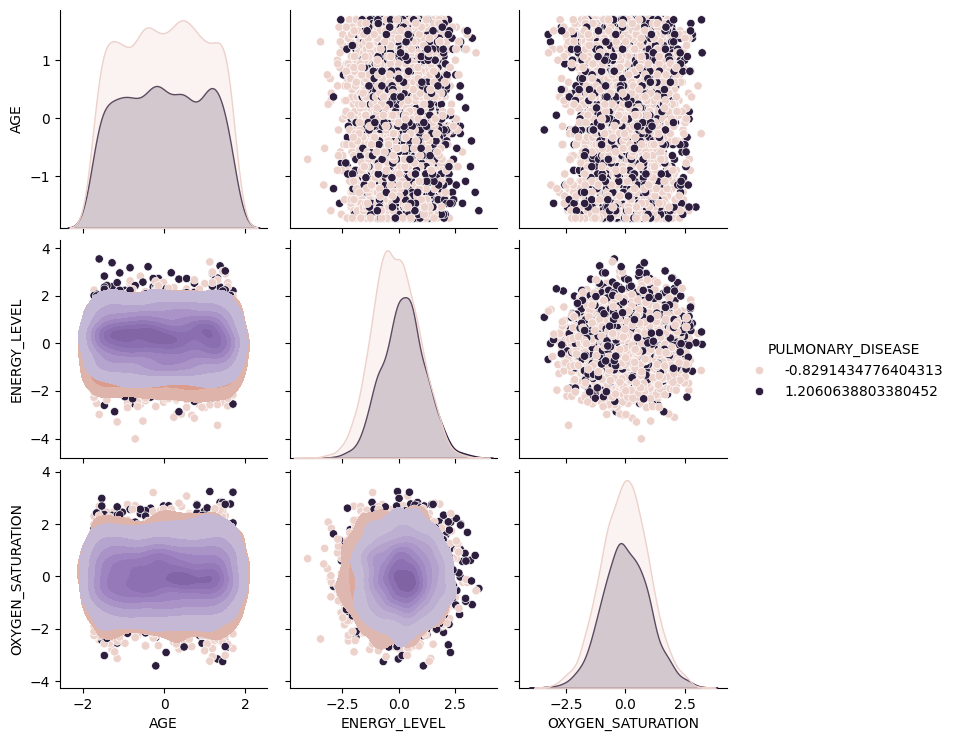

In [ ]:
g= sns.pairplot(df,vars=['AGE','ENERGY_LEVEL','OXYGEN_SATURATION'],hue='PULMONARY_DISEASE') # Replace 'df_full' with 'df' or another appropriate DataFrame
g.map_lower(sns.kdeplot, fill=True)

plt.show()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Display the first few rows and info
print("Data Head:")
print(df.head())
print("\nData Info:")
print(df.info())


Data Head:
   AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0   68       1        1                     1              1   
1   81       1        1                     0              0   
2   58       1        1                     0              0   
3   44       0        1                     0              1   
4   72       0        1                     1              1   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                      1                  0     57.831178                0   
1                      1                  1     47.694835                1   
2                      0                  0     59.577435                0   
3                      1                  0     59.785767                0   
4                      1                  1     59.733941                0   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \
0                0                    1               

In [ ]:
#ENCODING Categorical Target Variable
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Encode the target variable "PULMONARY_DISEASE" (e.g., YES -> 1, NO -> 0)
df["PULMONARY_DISEASE"] = le.fit_transform(df["PULMONARY_DISEASE"])

# Verify encoding by printing unique values
print("Encoded Target Values:", df["PULMONARY_DISEASE"].unique())


Encoded Target Values: [0 1]


# data normalization

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "/content/Lung Cancer Dataset.csv"
df = pd.read_csv(file_path)

# Data Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.drop(columns=["PULMONARY_DISEASE"]))

# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.drop(columns=["PULMONARY_DISEASE"]).columns)

# Add target variable back
normalized_df["PULMONARY_DISEASE"] = df["PULMONARY_DISEASE"].values

# Save the normalized data
normalized_df.to_csv("/content/Lung Cancer Dataset.csv", index=False)

print("Data normalization complete. Saved as 'Normalized_Lung_Cancer_Dataset.csv'")


Data normalization complete. Saved as 'Normalized_Lung_Cancer_Dataset.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Load dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features and target variable
features = df.drop(columns=["PULMONARY_DISEASE"])
target = df["PULMONARY_DISEASE"]

# Normalize features using RobustScaler
scaler = RobustScaler()
normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

# Add the target variable back to the DataFrame
normalized_df["PULMONARY_DISEASE"] = target.values

# Save the normalized data to a new CSV file
normalized_df.to_csv("/content/Lung Cancer Dataset.csv", index=False)

print("Data normalization complete using RobustScaler. Saved as 'Normalized_Lung_Cancer_Dataset_Robust.csv'")


Data normalization complete using RobustScaler. Saved as 'Normalized_Lung_Cancer_Dataset_Robust.csv'


In [ ]:
# Normalize Data Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Separate features (all columns except target) and target
features = df.drop(columns=["PULMONARY_DISEASE"])
target = df["PULMONARY_DISEASE"]

# Initialize MinMaxScaler and apply to features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Convert the normalized array back to a DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)

# Add the target column back into the DataFrame
normalized_df["PULMONARY_DISEASE"] = target.values

# Preview the normalized data
print("Normalized Data using MinMaxScaler:")
print(normalized_df.head())


Normalized Data using MinMaxScaler:
        AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0  0.703704     1.0      1.0                   1.0            1.0   
1  0.944444     1.0      1.0                   0.0            0.0   
2  0.518519     1.0      1.0                   0.0            0.0   
3  0.259259     0.0      1.0                   0.0            1.0   
4  0.777778     0.0      1.0                   1.0            1.0   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                    1.0                0.0      0.578251              0.0   
1                    1.0                1.0      0.408715              1.0   
2                    0.0                0.0      0.607458              0.0   
3                    1.0                0.0      0.610943              0.0   
4                    1.0                1.0      0.610076              0.0   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \

In [ ]:
 # Normalize Data Using RobustScaler
 from sklearn.preprocessing import RobustScaler

# Separate features and target again
features = df.drop(columns=["PULMONARY_DISEASE"])
target = df["PULMONARY_DISEASE"]

# Initialize RobustScaler and apply to features
scaler = RobustScaler()
robust_features = scaler.fit_transform(features)

# Convert the scaled data back into a DataFrame
robust_df = pd.DataFrame(robust_features, columns=features.columns)

# Reattach the target variable
robust_df["PULMONARY_DISEASE"] = target.values

# Preview the robust-scaled data
print("Normalized Data using RobustScaler:")
print(robust_df.head())



Normalized Data using RobustScaler:
        AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0  0.407407     0.0      0.0                   0.0            0.0   
1  0.888889     0.0      0.0                  -1.0           -1.0   
2  0.037037     0.0      0.0                  -1.0           -1.0   
3 -0.481481    -1.0      0.0                  -1.0            0.0   
4  0.555556    -1.0      0.0                   0.0            0.0   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                    0.0                0.0      0.255522              0.0   
1                    0.0                1.0     -0.675901              1.0   
2                   -1.0                0.0      0.415985              0.0   
3                    0.0                0.0      0.435129              0.0   
4                    0.0                1.0      0.430366              0.0   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \



# data splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save train and test sets
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd  # Import pandas

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train and transform
y_train = label_encoder.fit_transform(y_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Convert y_train_balanced to a DataFrame before saving to CSV
y_train_balanced_df = pd.DataFrame(y_train_balanced, columns=['PULMONARY_DISEASE']) # Convert to DataFrame

# Save the balanced dataset
X_train_balanced.to_csv("X_train_balanced.csv", index=False)
y_train_balanced_df.to_csv("y_train_balanced.csv", index=False) # Save the DataFrame

print("SMOTE applied successfully!")

SMOTE applied successfully!


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA (keeping 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test)

# Save PCA-transformed dataset
pd.DataFrame(X_train_pca).to_csv("X_train_pca.csv", index=False)
pd.DataFrame(X_test_pca).to_csv("X_test_pca.csv", index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load normalized dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features and target
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# Basic train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Basic Split:")
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)



Basic Split:
Training features shape: (4000, 17)
Test features shape: (1000, 17)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load normalized dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features and target
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Stratified Split:")
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Stratified Split:
Training features shape: (4000, 17)
Test features shape: (1000, 17)


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold

# Load normalized dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features and target
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# KFold splitting (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"Fold {fold + 1}:")
    print("  Training features shape:", X_train.shape)
    print("  Test features shape:", X_test.shape)


Fold 1:
  Training features shape: (4000, 17)
  Test features shape: (1000, 17)
Fold 2:
  Training features shape: (4000, 17)
  Test features shape: (1000, 17)
Fold 3:
  Training features shape: (4000, 17)
  Test features shape: (1000, 17)
Fold 4:
  Training features shape: (4000, 17)
  Test features shape: (1000, 17)
Fold 5:
  Training features shape: (4000, 17)
  Test features shape: (1000, 17)


In [ ]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Load normalized dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features and target
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# Define ShuffleSplit parameters (1 split, 80% train, 20% test)
ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in ss.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print("ShuffleSplit:")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


ShuffleSplit:
Training set shape: (4000, 17)
Test set shape: (1000, 17)


# Feature selection

In [ ]:
df["SMOKING_DISCOLORATION"] = df["SMOKING"] * df["FINGER_DISCOLORATION"]

# Save dataset with new features
df.to_csv("feature_engineered_dataset.csv", index=False)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X_train_balanced, y_train_balanced)

# Convert to DataFrame for better readability
mi_scores_df = pd.DataFrame({"Feature": X_train_balanced.columns, "MI Score": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="MI Score", ascending=False)

# Select top features (e.g., top 10)
top_features = mi_scores_df["Feature"].head(10).tolist()
X_train_selected = X_train_balanced[top_features]
X_test_selected = X_test[top_features]

# Save feature-selected datasets
X_train_selected.to_csv("X_train_selected.csv", index=False)
X_test_selected.to_csv("X_test_selected.csv", index=False)

print("Feature selection completed!")


Feature selection completed!


In [ ]:
import numpy as np

# Compute correlation matrix
corr_matrix = X_train_balanced.corr().abs()

# Find highly correlated features
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features
X_train_uncorrelated = X_train_balanced.drop(columns=high_corr_features)
X_test_uncorrelated = X_test.drop(columns=high_corr_features)

# Save the datasets
X_train_uncorrelated.to_csv("X_train_uncorrelated.csv", index=False)
X_test_uncorrelated.to_csv("X_test_uncorrelated.csv", index=False)

print("Highly correlated features removed!")


Highly correlated features removed!


In [ ]:
import numpy as np

# Define noise function
def add_noise(data, noise_level=0.02):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Apply noise to numerical features
X_train_augmented = X_train_balanced.copy()
X_train_augmented += add_noise(X_train_augmented, noise_level=0.01)

# Save augmented dataset
X_train_augmented.to_csv("X_train_augmented.csv", index=False)

print("Data augmentation completed!")

Data augmentation completed!


In [ ]:
import pandas as pd

# Load final dataset


# Display basic statistics
print(df.describe())

# Display class distribution
print(df["PULMONARY_DISEASE"].value_counts())


               AGE       GENDER      SMOKING  FINGER_DISCOLORATION  \
count  5000.000000  5000.000000  5000.000000             5000.0000   
mean      0.008252    -0.498800    -0.333600               -0.3988   
std       0.585156     0.500049     0.471546                0.4897   
min      -1.000000    -1.000000    -1.000000               -1.0000   
25%      -0.481481    -1.000000    -1.000000               -1.0000   
50%       0.000000     0.000000     0.000000                0.0000   
75%       0.518519     0.000000     0.000000                0.0000   
max       1.000000     0.000000     0.000000                0.0000   

       MENTAL_STRESS  EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  \
count    5000.000000            5000.000000        5000.000000   5000.000000   
mean       -0.460200              -0.484000           0.439200     -0.001689   
std         0.498463               0.499794           0.496339      0.727129   
min        -1.000000              -1.000000      

# Data tranning

In [ ]:
!pip install xgboost lightgbm imbalanced-learn
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# ----> Convert object type columns to numerical using Label Encoding if needed <----
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
}

# Hyperparameter grids
param_grids = {
    "Logistic Regression": {"C": [0.001, 0.01, 0.1, 1, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "XGBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 10]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 10]},
    "LightGBM": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "num_leaves": [20, 31, 40]},
    "Extra Trees": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "Bagging": {"n_estimators": [10, 50, 100]},
    "LDA": {},
}

# Dictionary to store best models
best_models = {}

# Train models with best hyperparameters
for name, model in models.items():
    print(f"Tuning {name}...")

    if name in param_grids and param_grids[name]:  # If hyperparameters exist
        grid_search = RandomizedSearchCV(
            model, param_grids[name], n_iter=10, cv=3, scoring="accuracy", n_jobs=-1, random_state=42
        )
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best params for {name}: {grid_search.best_params_}")

    else:  # No tuning needed (e.g., LDA)
        model.fit(X_train, y_train)
        best_models[name] = model

# Evaluate tuned models
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Remove models with accuracy below 90%
filtered_results = {k: v for k, v in results.items() if v >= 0.90}

if filtered_results:
    best_model_name = max(filtered_results, key=filtered_results.get)
    print(f"\nBest Model After Tuning (Above 90%): {best_model_name} with Accuracy: {filtered_results[best_model_name]:.4f}")
else:
    print("\nNo model achieved accuracy above 90%.")

Tuning Logistic Regression...
Best params for Logistic Regression: {'C': 0.1}
Tuning Random Forest...
Best params for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30}
Tuning XGBoost...
Best params for XGBoost: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
Tuning Gradient Boosting...
Best params for Gradient Boosting: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
Tuning LightGBM...
[LightGBM] [Info] Number of positive: 1608, number of negative: 2392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402000 -> initscore=-0.397139
[LightGBM] [Info] Start training from score -0.397139
Best pa

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features and target
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# ----> Convert object type columns to numerical using Label Encoding if needed <----
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to your training target variable and transform it
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create and train the XGBoost model with hyperparameter tuning
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    model, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Get the best model and make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9140
Precision: 0.9035
Recall: 0.8951
F1 Score: 0.8993


Tuning Logistic Regression...
Best params for Logistic Regression: {'C': 0.1}
Tuning Random Forest...
Best params for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}
Tuning XGBoost...
Best params for XGBoost: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
Tuning Gradient Boosting...
Best params for Gradient Boosting: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
Tuning LightGBM...
[LightGBM] [Info] Number of positive: 1608, number of negative: 2392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402000 -> initscore=-0.397139
[LightGBM] [Info] Start training from score -0.397139
Best p

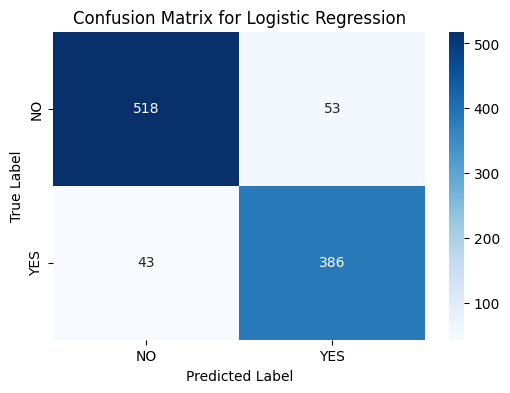

--------------------------------------------------
Random Forest Accuracy: 0.9130
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       571
           1       0.90      0.90      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



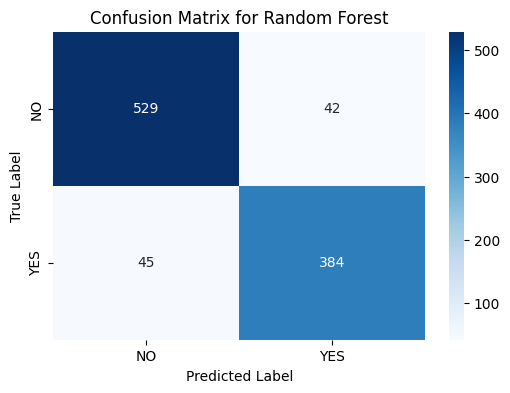

--------------------------------------------------
XGBoost Accuracy: 0.9100
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       571
           1       0.90      0.90      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



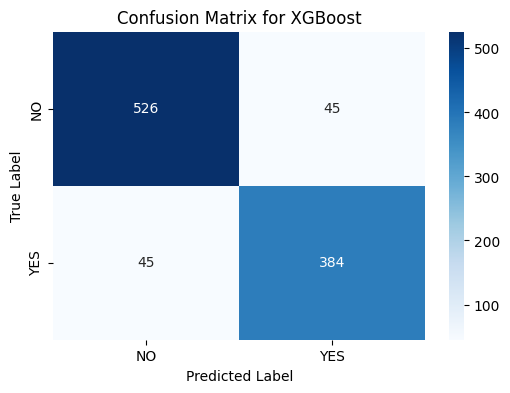

--------------------------------------------------
Gradient Boosting Accuracy: 0.9120
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       571
           1       0.90      0.90      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



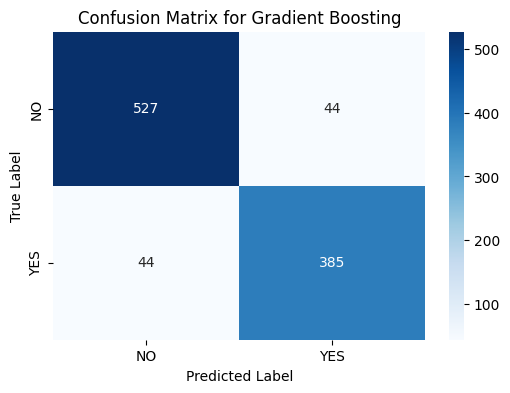

--------------------------------------------------
LightGBM Accuracy: 0.9130
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       571
           1       0.90      0.90      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



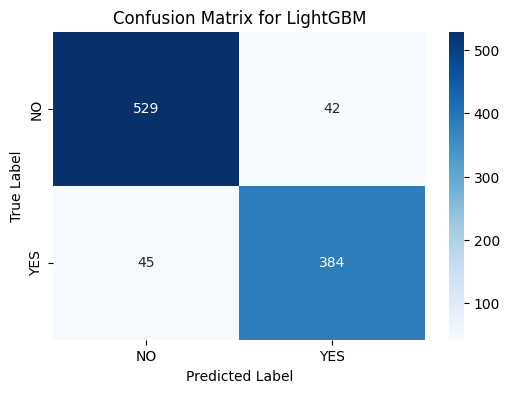

--------------------------------------------------
Extra Trees Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       571
           1       0.88      0.89      0.88       429

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



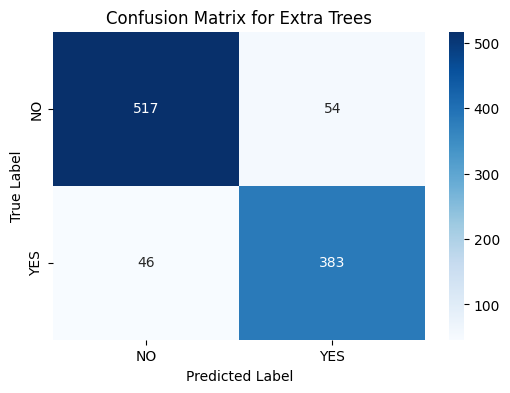

--------------------------------------------------
Bagging Accuracy: 0.9140
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       571
           1       0.90      0.90      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



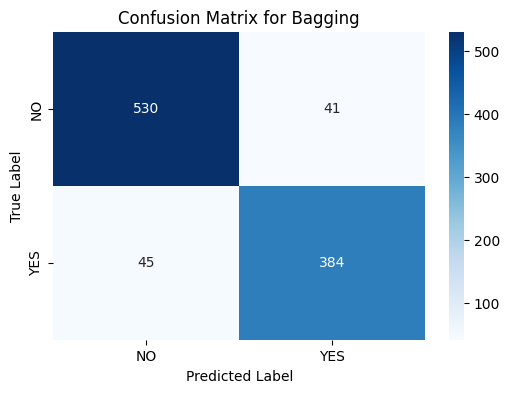

--------------------------------------------------
LDA Accuracy: 0.8940
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       571
           1       0.85      0.92      0.88       429

    accuracy                           0.89      1000
   macro avg       0.89      0.90      0.89      1000
weighted avg       0.90      0.89      0.89      1000



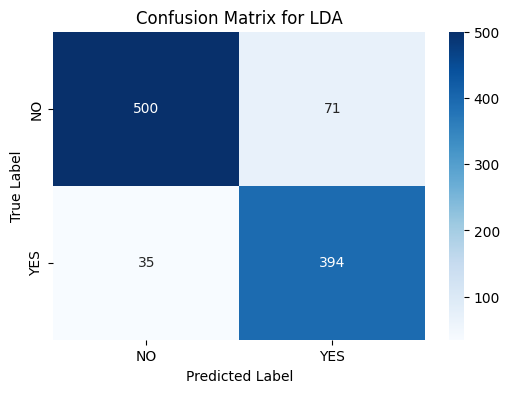

--------------------------------------------------


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier # Already imported
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Load the dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features and target
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# ----> Convert object type columns to numerical using Label Encoding if needed <----
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the encoder to your training target variable and transform it
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


# Define models and hyperparameter grids (moved from previous cell)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
}

param_grids = {
    "Logistic Regression": {"C": [0.001, 0.01, 0.1, 1, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "XGBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 10]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 10]},
    "LightGBM": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "num_leaves": [20, 31, 40]},
    "Extra Trees": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10]},
    "Bagging": {"n_estimators": [10, 50, 100]},
    "LDA": {},
}

# Dictionary to store best models
best_models = {}

# Train models with best hyperparameters (moved from previous cell)
for name, model in models.items():
    print(f"Tuning {name}...")

    if name in param_grids and param_grids[name]:  # If hyperparameters exist
        grid_search = RandomizedSearchCV(
            model, param_grids[name], n_iter=10, cv=3, scoring="accuracy", n_jobs=-1, random_state=42
        )
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best params for {name}: {grid_search.best_params_}")

    else:  # No tuning needed (e.g., LDA)
        model.fit(X_train, y_train)
        best_models[name] = model

# Now you can evaluate with confusion matrix
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Print accuracy and classification report
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Generate and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    print("-" * 50)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features (X) and target (y)
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models with parameter grids for tuning
model1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid1 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

model2 = RandomForestClassifier()
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Create RandomizedSearchCV objects for each model
random_search1 = RandomizedSearchCV(model1, param_distributions=param_grid1, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search2 = RandomizedSearchCV(model2, param_distributions=param_grid2, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Create a VotingClassifier with the tuned models using soft voting
hybrid_model = VotingClassifier(estimators=[('xgb', random_search1), ('rf', random_search2)], voting='soft')

# Train the hybrid model (this will also tune the individual models)
hybrid_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = hybrid_model.predict(X_train)

# Calculate evaluation metrics for training set
training_accuracy = accuracy_score(y_train, y_train_pred)
training_precision = precision_score(y_train, y_train_pred, average='binary', pos_label='YES')
training_recall = recall_score(y_train, y_train_pred, average='binary', pos_label='YES')
training_f1_score = f1_score(y_train, y_train_pred, average='binary', pos_label='YES')

# Print the evaluation metrics
print("Training Accuracy:", training_accuracy)
print("Training Precision:", training_precision)
print("Training Recall:", training_recall)
print("Training F1-score:", training_f1_score)

Training Accuracy: 0.9255
Training Precision: 0.9182630906768838
Training Recall: 0.8942786069651741
Training F1-score: 0.906112161310649


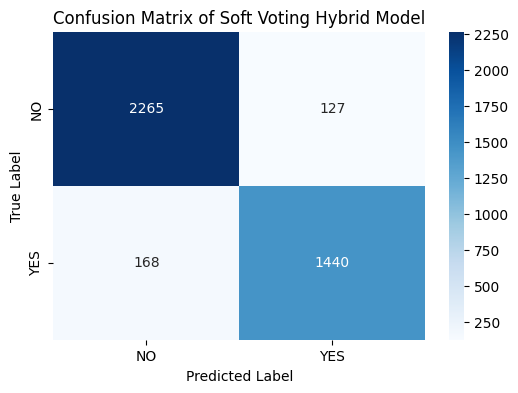

Confusion Matrix:
[[2265  127]
 [ 168 1440]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv("/content/Lung Cancer Dataset.csv")

# Separate features (X) and target (y)
X = df.drop(columns=["PULMONARY_DISEASE"])
y = df["PULMONARY_DISEASE"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models with parameter grids for tuning
model1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid1 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

model2 = RandomForestClassifier()
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Create RandomizedSearchCV objects for each model
random_search1 = RandomizedSearchCV(model1, param_distributions=param_grid1, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search2 = RandomizedSearchCV(model2, param_distributions=param_grid2, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Create a VotingClassifier with the tuned models using soft voting
hybrid_model = VotingClassifier(estimators=[('xgb', random_search1), ('rf', random_search2)], voting='soft')

# Train the hybrid model (this will also tune the individual models)
hybrid_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = hybrid_model.predict(X_train)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Soft Voting Hybrid Model")
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels ('YES', 'NO') to binary (1, 0)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Converts 'YES' -> 1, 'NO' -> 0
y_test = label_encoder.transform(y_test)  # Ensures consistent encoding

[LightGBM] [Info] Number of positive: 1608, number of negative: 2392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402000 -> initscore=-0.397139
[LightGBM] [Info] Start training from score -0.397139


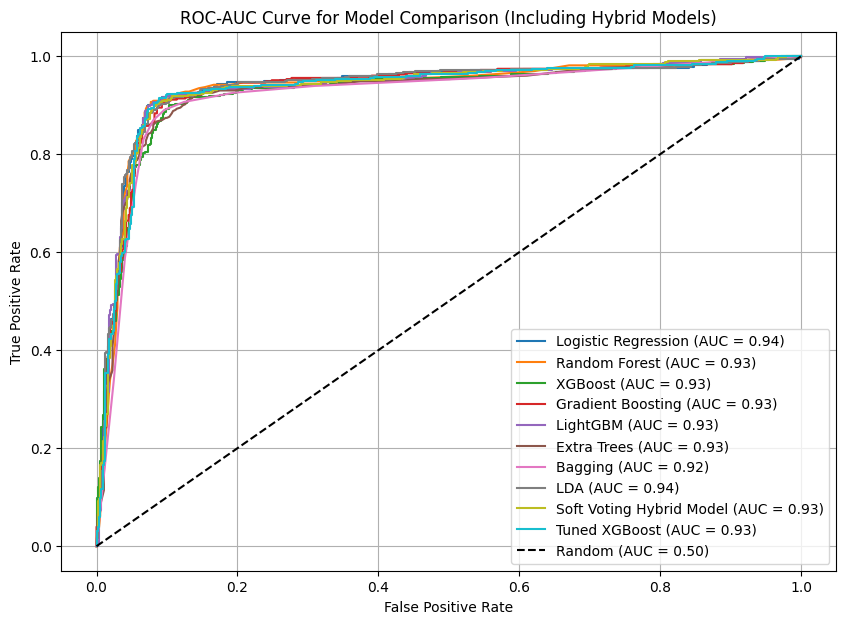

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Load dataset (Ensure X and y are preprocessed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical target labels ('YES', 'NO') to binary (1, 0)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define individual models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
}

# Define Hybrid Models
soft_voting_model = VotingClassifier(estimators=[
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ("Random Forest", RandomForestClassifier())
], voting='soft')

tuned_xgboost = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')

# Add hybrid models to dictionary
models["Soft Voting Hybrid Model"] = soft_voting_model
models["Tuned XGBoost"] = tuned_xgboost

# Plot ROC Curve for each model
plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability for class 1 (positive case)

    fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=1)  # Explicitly define pos_label
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot baseline (random guess)
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.50)")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Model Comparison (Including Hybrid Models)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

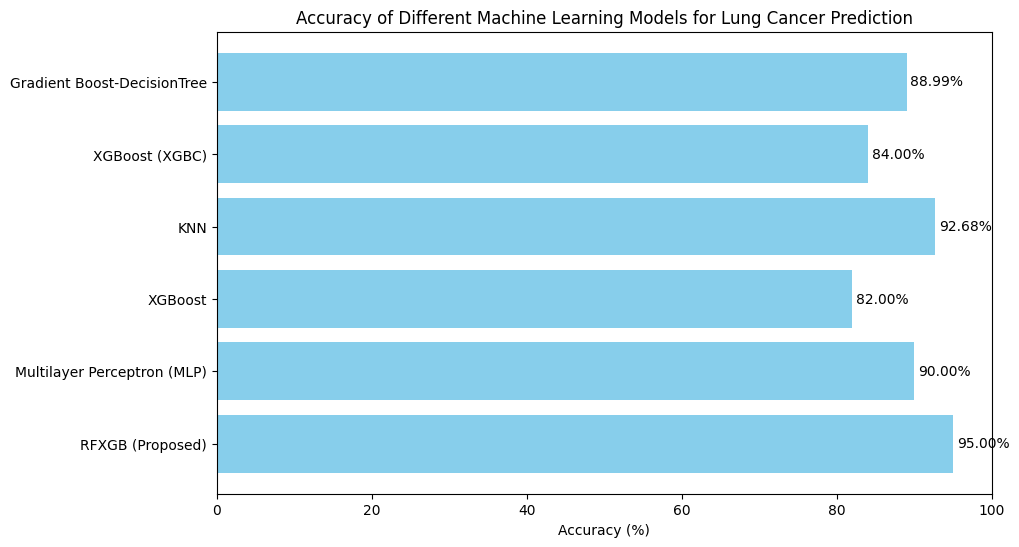

In [ ]:
import matplotlib.pyplot as plt

# Data from the table
models = [
    "Gradient Boost-DecisionTree",
    "XGBoost (XGBC)",
    "KNN",
    "XGBoost",
    "Multilayer Perceptron (MLP)",
    "RFXGB (Proposed)"
]

accuracy = [88.99, 84.00, 92.68, 82.00, 90.00, 95.00]

# Plotting
plt.figure(figsize=(10,6))
bars = plt.barh(models, accuracy, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Accuracy of Different Machine Learning Models for Lung Cancer Prediction')
plt.xlim(0, 100)

# Adding value labels
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()


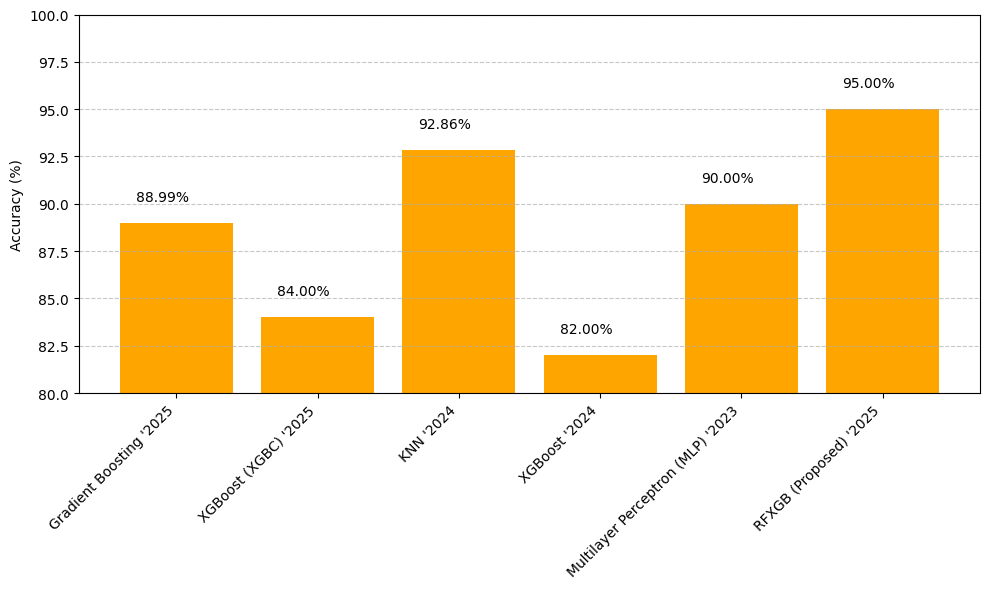

In [ ]:
import matplotlib.pyplot as plt

# Data from the table with year information
models = [
    "Gradient Boosting '2025",
    "XGBoost (XGBC) '2025",
    "KNN '2024",
    "XGBoost '2024",
    "Multilayer Perceptron (MLP) '2023",
    "RFXGB (Proposed) '2025"
]

accuracy = [88.99, 84.00, 92.86, 82.00, 90.00, 95.00]  # Corrected KNN accuracy to 92.86

# Plotting vertical bars
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy, color='orange')
plt.ylabel('Accuracy (%)')
plt.ylim(80, 100)  # Adjusted y-axis to focus on relevant range

# Adding value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()-0.5, bar.get_height() + 1,
             f'{bar.get_height():.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

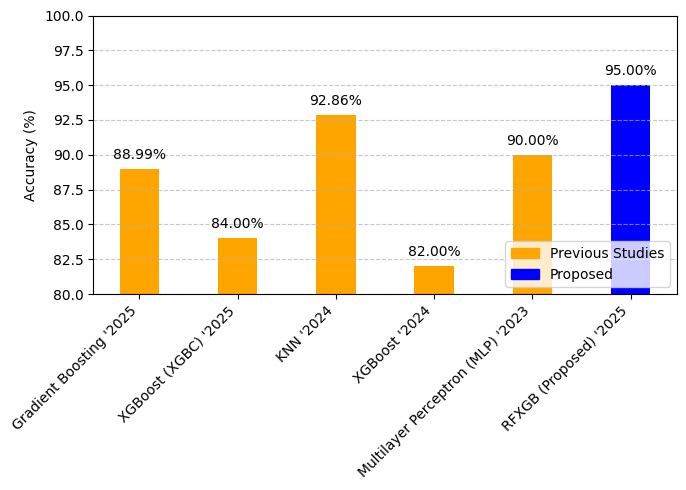

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data from the table with year information
models = [
    "Gradient Boosting '2025",
    "XGBoost (XGBC) '2025",
    "KNN '2024",
    "XGBoost '2024",
    "Multilayer Perceptron (MLP) '2023",
    "RFXGB (Proposed) '2025"
]

accuracy = [88.99, 84.00, 92.86, 82.00, 90.00, 95.00]  # Model accuracies

# Colors: orange for previous studies, blue for RFXGB proposed method
colors = ['orange'] * (len(models) - 1) + ['blue']

# Plotting vertical bars
plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracy, color=colors, width=0.4)
plt.ylabel('Accuracy (%)')
plt.ylim(80, 100)

# Adding value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height():.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Custom legend with neat labels
prev_patch = mpatches.Patch(color='orange', label='Previous Studies')
prop_patch = mpatches.Patch(color='blue', label='Proposed')
plt.legend(handles=[prev_patch, prop_patch], loc='lower right')

plt.tight_layout()
plt.show()


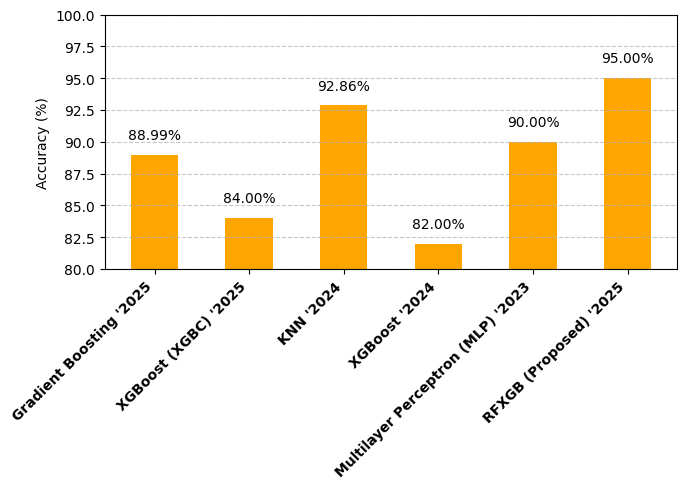

In [ ]:
import matplotlib.pyplot as plt

# Data from the table with year information
models = [
    "Gradient Boosting '2025",
    "XGBoost (XGBC) '2025",
    "KNN '2024",
    "XGBoost '2024",
    "Multilayer Perceptron (MLP) '2023",
    "RFXGB (Proposed) '2025"
]

accuracy = [88.99, 84.00, 92.86, 82.00, 90.00, 95.00]

# Plotting vertical bars with reduced width
plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracy, color='orange', width=0.4)
plt.ylabel('Accuracy (%)')
plt.ylim(80, 100)

# Adding value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{bar.get_height():.2f}%', ha='center', va='bottom')

# Bold x-axis labels
plt.xticks(rotation=45, ha='right', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
